In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [7]:
train.isnull().sum().sort_values(ascending = False).head(30)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
Exterior2nd        0
Exterior1st        0
RoofMatl           0
RoofStyle          0
YearBuilt          0
dtype: int64

In [8]:
cor = train.corr()
cor_fe = cor.index[abs(cor['SalePrice']) >= 0.3]
cor_fe

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

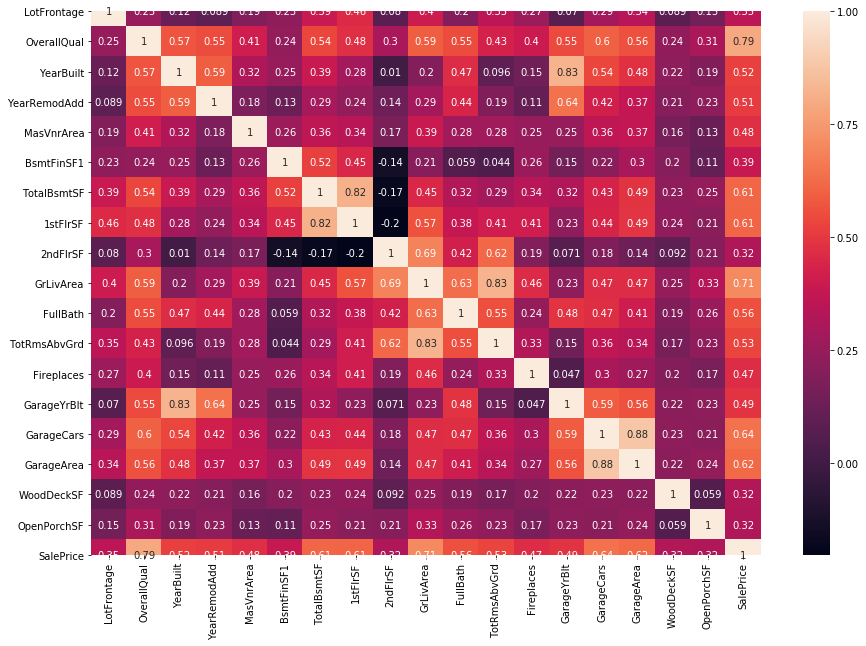

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(train[cor_fe].corr(),annot=True)

In [10]:
#concat

In [11]:
df = pd.concat((train.iloc[:, 1:-1], test.iloc[:, 1:]))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [12]:
#NULL값이 많을경우 지워주는게 좋다.
null_df = df.isna().sum() / len(df)

In [13]:
null_df[null_df >= 0.5]

Alley          0.932169
PoolQC         0.996574
Fence          0.804385
MiscFeature    0.964029
dtype: float64

In [14]:
remove_col = null_df[null_df >= 0.5].keys()

In [15]:
df = df.drop(remove_col, axis=1)

왜도 확인

In [16]:
from scipy import stats

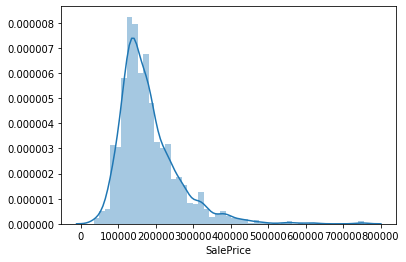

In [17]:
sns.distplot(train['SalePrice'])

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

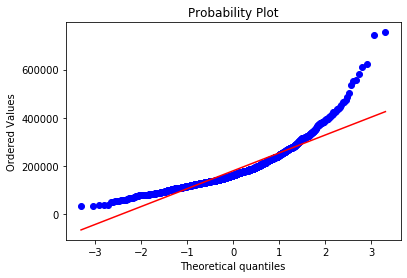

In [18]:
stats.probplot(train['SalePrice'], plot=plt)

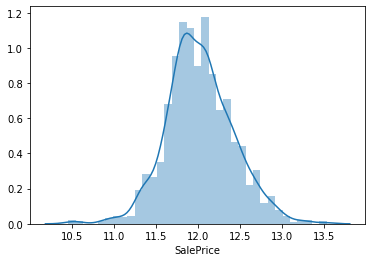

In [19]:
train['SalePrice'] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'])

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.3982596466541509, 12.024057394918403, 0.9953761551826703))

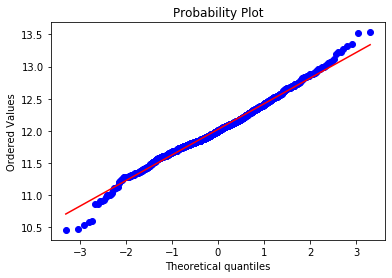

In [20]:
stats.probplot(train['SalePrice'], plot=plt)

In [21]:
target = train['SalePrice']

순서형과 명목형 데이터 분리 

In [22]:
df_obj = df.select_dtypes(include='object')
df_obj.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [23]:
df_num = df.select_dtypes(exclude = 'object')
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008


In [24]:
df_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

Missing value 처리 

수치형

In [25]:
li_num = list(df_num.columns)

In [26]:
from sklearn.preprocessing import Imputer

In [27]:
imp = Imputer(strategy = 'mean')
imp.fit(df_num)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [28]:
df[li_num] = imp.fit_transform(df[li_num].values)

In [29]:
df[li_num].isnull().sum().sum()

0

범주형

In [30]:
li_obj = list(df_obj.columns)

In [31]:
df[li_obj].isnull().sum().sort_values(ascending = False).head(20)

FireplaceQu     1420
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Utilities          2
Functional         2
Electrical         1
KitchenQual        1
SaleType           1
Exterior2nd        1
Exterior1st        1
LandContour        0
dtype: int64

Filling missing values
For a few columns there is lots of NaN entries.
However, reading the data description we find this is not missing data:
For PoolQC, NaN is not missing data but means no pool, likewise for Fence, FireplaceQu etc.

In [32]:
for col in ['FireplaceQu','GarageCond','GarageQual','GarageFinish','GarageType',
           'BsmtCond','BsmtExposure','BsmtQual','BsmtFinType2','BsmtFinType1','MasVnrType',
           'MSZoning','Utilities','Functional','Electrical','KitchenQual','SaleType',
           'Exterior2nd','Exterior1st']:
    df[col].fillna('None',inplace = True)

In [33]:
df.isnull().sum().sum()

0

수치형 변수

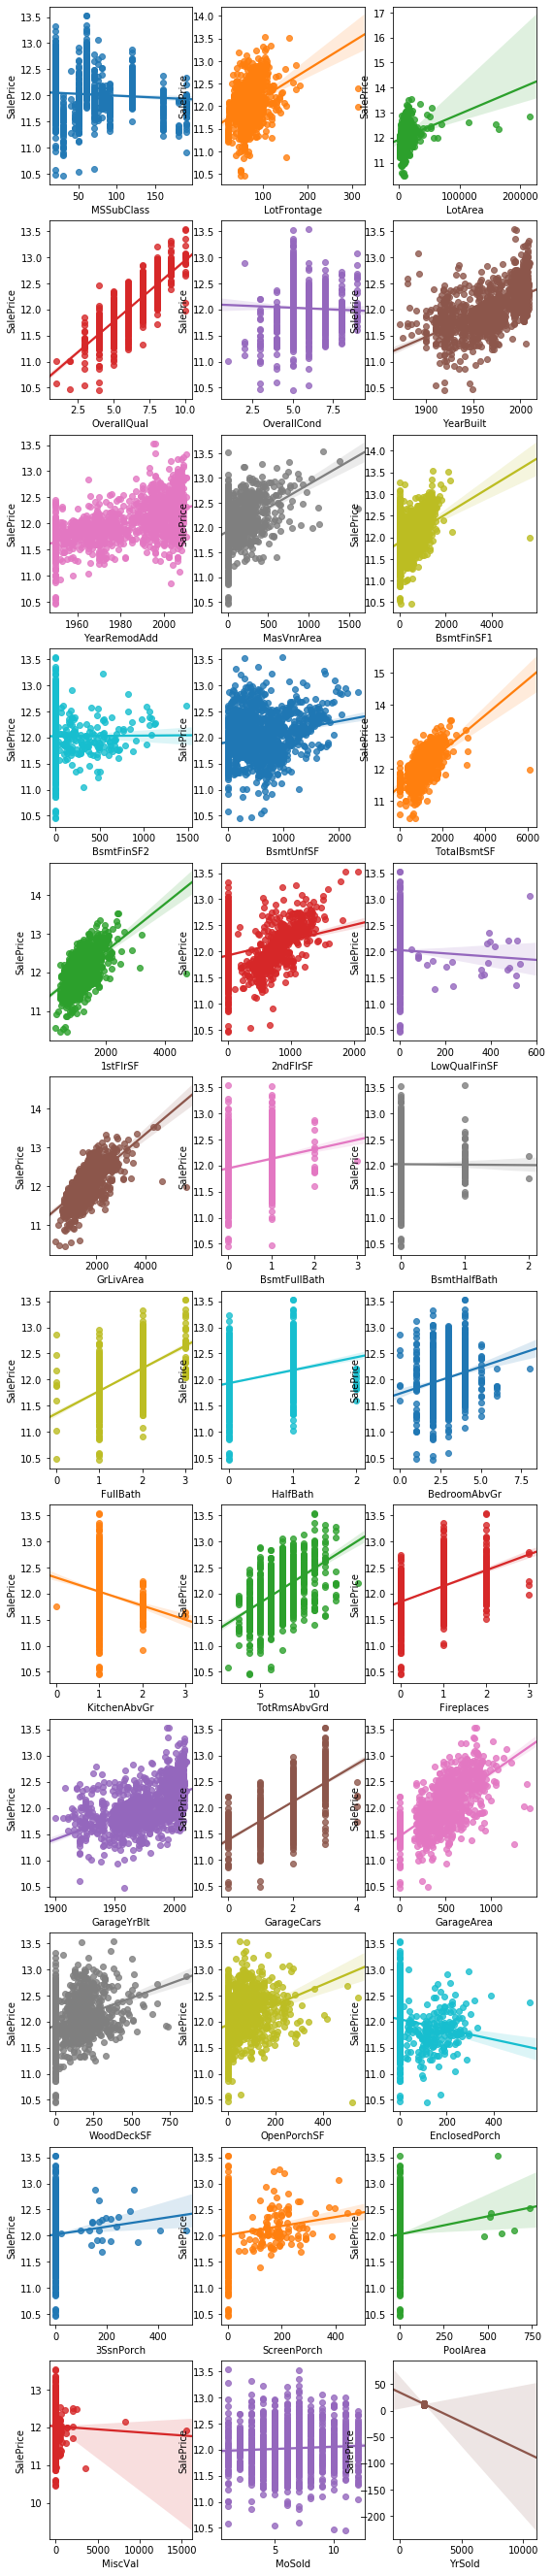

In [34]:
row = 12
col = 3 

fig, axs = plt.subplots(row,col, figsize = (col*3,row*4))

for r in range(0,row):
    for c in range(0,col):
        i = r*col + c
        if i < len(li_num):
            sns.regplot(train[li_num[i]],target , ax = axs[r][c])
            #str = stats.pearsonr(train[li_num[i]],target)
            #title = "r="+"{0.2f}".format(str[0]) +" " "P="+ "{0.2f}".format(str[1])
            #axs[r][c].set_title(title)

In [35]:
stats.pearsonr(train[li_num[11]],target)

(0.6121342283262257, 7.531828096458291e-151)

In [36]:
li_num[24]

'GarageYrBlt'

In [37]:
strong_num = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF',
             'FullBath','TotRmsAbvGrd','GarageYrBlt','GarageCars','GrLivArea']

범주형 변수 

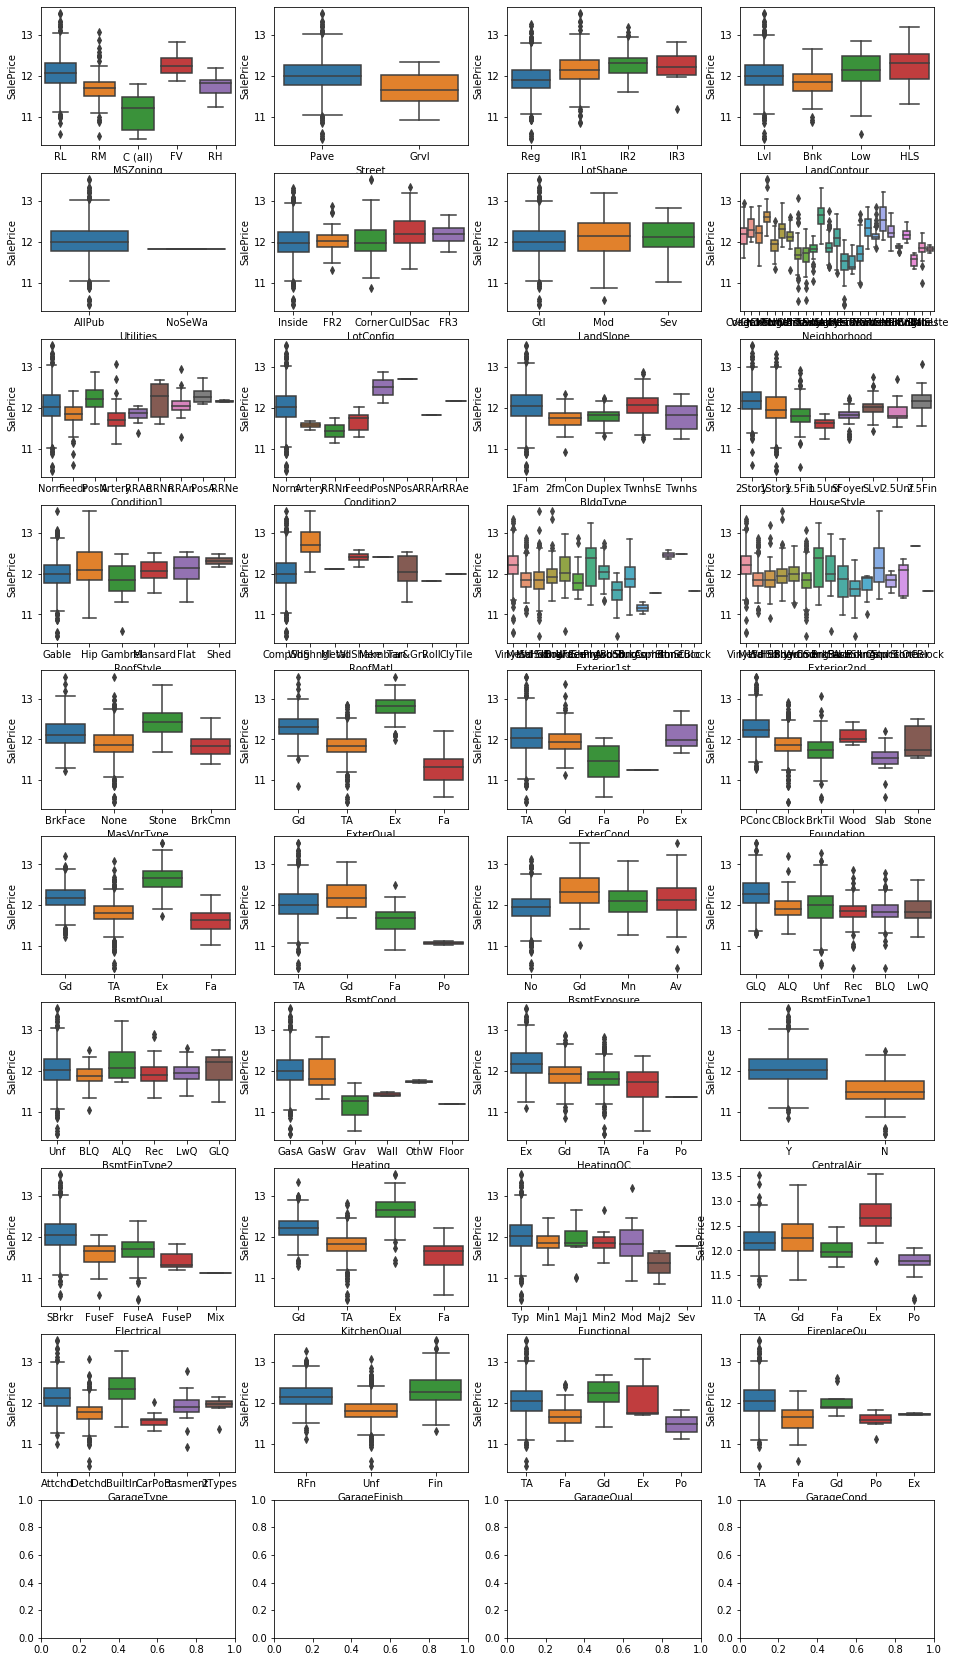

In [38]:
row = 10
col = 4 

fig, axs = plt.subplots(row,col, figsize = (col*4,row*3))

for r in range(0,row):
    for c in range(0,col):
        i = r*col + c
        if i < len(li_num):
            sns.boxplot(train[li_obj[i]],target , ax = axs[r][c])

In [39]:
strong_obj = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']
weak_obj  = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]

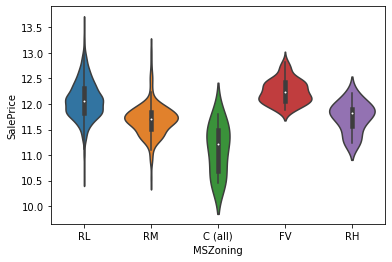

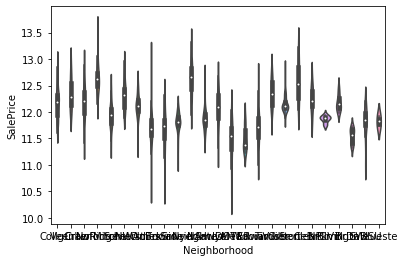

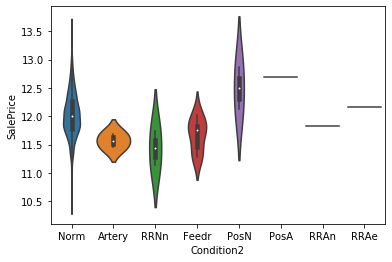

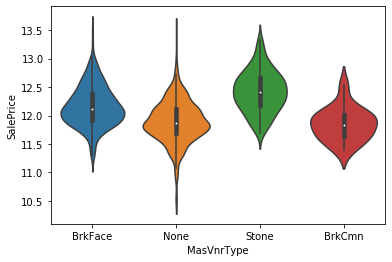

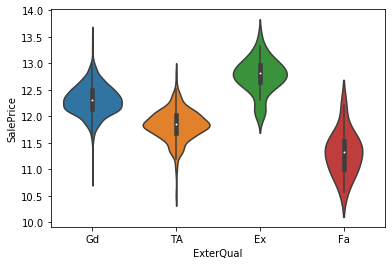

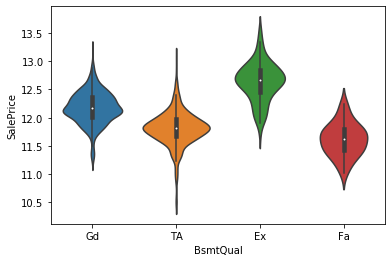

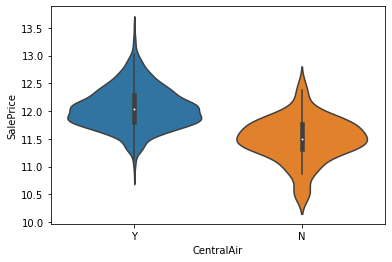

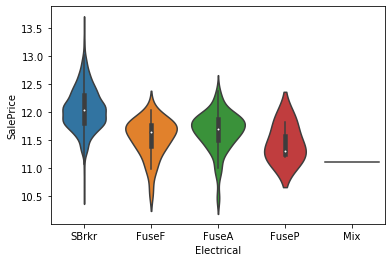

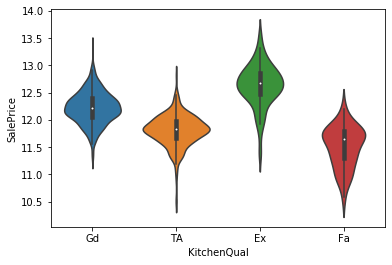

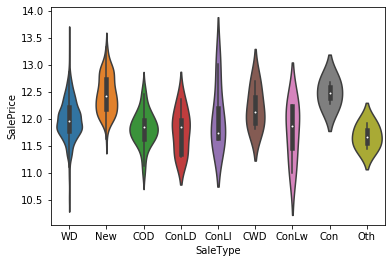

In [40]:
for li in strong_obj:
    sns.violinplot(x= li, y = target, data=train)
    plt.show()

In [41]:
strong_num

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GrLivArea']

In [42]:
strong_obj

['MSZoning',
 'Neighborhood',
 'Condition2',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'SaleType']

box-cox 변환 

In [43]:
from scipy.stats import skew 
skewness = df[li_num].apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146034
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931343
MasVnrArea        2.611549
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.645574
1stFlrSF          1.469604
BsmtFinSF1        1.425233
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.162484
BsmtUnfSF         0.919508
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.623955
OverallCond       0.570312
BedroomAbvGr      0.326324
GarageArea        0.241218
OverallQual       0.197110
MoSold            0.195884
FullBath          0.167606
YrSold            0.132399
GarageCars       -0.218298
GarageYrBlt      -0.392790
YearRemodAdd     -0.451020
YearBuilt        -0.599806
dtype: float64

In [44]:
skewness = skewness[abs(skewness) > 0.5]
skewness

MSSubClass        1.375457
LotFrontage       1.645574
LotArea          12.822431
OverallCond       0.570312
YearBuilt        -0.599806
MasVnrArea        2.611549
BsmtFinSF1        1.425233
BsmtFinSF2        4.146034
BsmtUnfSF         0.919508
TotalBsmtSF       1.162484
1stFlrSF          1.469604
2ndFlrSF          0.861675
LowQualFinSF     12.088761
GrLivArea         1.269358
BsmtFullBath      0.623955
BsmtHalfBath      3.931343
HalfBath          0.694566
KitchenAbvGr      4.302254
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
WoodDeckSF        1.842433
OpenPorchSF       2.535114
EnclosedPorch     4.003891
3SsnPorch        11.376065
ScreenPorch       3.946694
PoolArea         16.898328
MiscVal          21.947195
dtype: float64

In [45]:
df[skewness.index] = np.log1p(df[skewness.index])

In [46]:
df[li_num].apply(lambda x: skew(x)).sort_values(ascending=False)

PoolArea         14.998335
3SsnPorch         8.825256
LowQualFinSF      8.557690
MiscVal           5.213984
BsmtHalfBath      3.774246
KitchenAbvGr      3.520351
ScreenPorch       2.945905
BsmtFinSF2        2.458515
EnclosedPorch     1.961081
HalfBath          0.580692
MasVnrArea        0.504573
BsmtFullBath      0.423770
BedroomAbvGr      0.326324
2ndFlrSF          0.305049
MSSubClass        0.245157
GarageArea        0.241218
Fireplaces        0.237587
OverallQual       0.197110
MoSold            0.195884
FullBath          0.167606
WoodDeckSF        0.158033
YrSold            0.132399
1stFlrSF          0.064828
TotRmsAbvGrd      0.035107
GrLivArea         0.013188
OpenPorchSF      -0.041797
GarageCars       -0.218298
GarageYrBlt      -0.392790
YearRemodAdd     -0.451020
LotArea          -0.504751
BsmtFinSF1       -0.618185
YearBuilt        -0.626215
OverallCond      -0.746183
LotFrontage      -1.019461
BsmtUnfSF        -2.159207
TotalBsmtSF      -4.981737
dtype: float64

In [47]:
df['LowQualFinSF']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1454    0.0
1455    0.0
1456    0.0
1457    0.0
1458    0.0
Name: LowQualFinSF, Length: 2919, dtype: float64

데이터 확인 결과 0값이 많은 것으로 판단됌

라벨인코더

In [48]:
strong_obj

['MSZoning',
 'Neighborhood',
 'Condition2',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'SaleType']

In [49]:
strong_num

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GrLivArea']

In [50]:
new_df = df[strong_num+strong_obj]
new_df

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GrLivArea,MSZoning,Neighborhood,Condition2,MasVnrType,ExterQual,BsmtQual,CentralAir,Electrical,KitchenQual,SaleType
0,7.0,7.602900,2003.0,6.753438,6.753438,2.0,2.197225,2003.000000,2.0,7.444833,RL,CollgCr,Norm,BrkFace,Gd,Gd,Y,SBrkr,Gd,WD
1,6.0,7.589336,1976.0,7.141245,7.141245,2.0,1.945910,1976.000000,2.0,7.141245,RL,Veenker,Norm,None,TA,Gd,Y,SBrkr,TA,WD
2,7.0,7.601902,2002.0,6.825460,6.825460,2.0,1.945910,2001.000000,2.0,7.488294,RL,CollgCr,Norm,BrkFace,Gd,Gd,Y,SBrkr,Gd,WD
3,7.0,7.557995,1970.0,6.629363,6.869014,1.0,2.079442,1998.000000,3.0,7.448916,RL,Crawfor,Norm,None,TA,TA,Y,SBrkr,Gd,WD
4,8.0,7.601402,2000.0,7.044033,7.044033,2.0,2.302585,2000.000000,3.0,7.695758,RL,NoRidge,Norm,BrkFace,Gd,Gd,Y,SBrkr,Gd,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4.0,7.586296,1970.0,6.304449,6.304449,1.0,1.791759,1978.113406,0.0,6.996681,RM,MeadowV,Norm,None,TA,TA,Y,SBrkr,TA,WD
1455,4.0,7.586296,1970.0,6.304449,6.304449,1.0,1.945910,1970.000000,1.0,6.996681,RM,MeadowV,Norm,None,TA,TA,Y,SBrkr,TA,WD
1456,5.0,7.581210,1996.0,7.110696,7.110696,1.0,2.079442,1960.000000,2.0,7.110696,RL,Mitchel,Norm,None,TA,TA,Y,SBrkr,TA,WD
1457,5.0,7.597396,1992.0,6.816736,6.878326,1.0,1.945910,1978.113406,0.0,6.878326,RL,Mitchel,Norm,None,TA,Gd,Y,SBrkr,TA,WD


In [51]:
from sklearn.preprocessing import LabelEncoder

# process columns, apply LabelEncoder to categorical features
for c in strong_obj:
    lb = LabelEncoder() 
    lb.fit(list(new_df[c].values)) 
    new_df[c] = lb.transform(list(new_df[c].values))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [52]:
new_df.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GrLivArea,MSZoning,Neighborhood,Condition2,MasVnrType,ExterQual,BsmtQual,CentralAir,Electrical,KitchenQual,SaleType
0,7.0,7.602900,2003.0,6.753438,6.753438,2.0,2.197225,2003.0,2.0,7.444833,4,5,2,1,2,2,1,5,2,9
1,6.0,7.589336,1976.0,7.141245,7.141245,2.0,1.945910,1976.0,2.0,7.141245,4,24,2,2,3,2,1,5,4,9
2,7.0,7.601902,2002.0,6.825460,6.825460,2.0,1.945910,2001.0,2.0,7.488294,4,5,2,1,2,2,1,5,2,9
3,7.0,7.557995,1970.0,6.629363,6.869014,1.0,2.079442,1998.0,3.0,7.448916,4,6,2,2,3,4,1,5,2,9
4,8.0,7.601402,2000.0,7.044033,7.044033,2.0,2.302585,2000.0,3.0,7.695758,4,15,2,1,2,2,1,5,2,9


모델링

In [53]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression

train_test_split

In [54]:
new_train = new_df[:train.shape[0]]
new_test = new_df[train.shape[0]:]

In [55]:
X_train, X_val, y_train, y_val = train_test_split(new_train, target, test_size=0.2, shuffle=True)

단순선형회귀

In [56]:
import statsmodels.api as sm

In [57]:
model = sm.OLS(target.values, new_train)

In [58]:
re = model.fit()

In [59]:
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.193e+05
Date:                Fri, 08 May 2020   Prob (F-statistic):                        0.00
Time:                        11:44:42   Log-Likelihood:                          625.61
No. Observations:                1460   AIC:                                     -1211.
Df Residuals:                    1440   BIC:                                     -1105.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual      0.0826      0.005     15.363      0.000       0.072       0.093
YearBuilt        0.7136      0.099      7.198      0.000       0.519       0.908
YearRemodAdd     0.0014      0.000      4.791      0.000       0.001       0.002
TotalBsmtSF      0.0235      0.004      5.817      0.000       0.016       0.031
1stFlrSF         0.1841      0.017     10.960      0.000       0.151       0.217
FullBath         0.0003      0.011      0.029      0.977      -0.022       0.023
TotRmsAbvGrd    -0.0142      0.036     -0.393      0.694      -0.085       0.056
GarageYrBlt     -0.0004      0.000     -1.487      0.137      -0.001       0.000
GarageCars       0.0808      0.008     10.586      0.000       0.066       0.096
GrLivArea        0.3474      0.028     12.265      0.000       0.292       0.403
MSZoning        -0.0097      0.006     -1.765      0.078      -0.021       0.001
Neighborhood  -7.42e-05      0.001     -0.101      0.920      -0.002       0.001
Condition2      -0.0130      0.016     -0.804      0.421      -0.045       0.019
MasVnrType       0.0023      0.007      0.329      0.743      -0.011       0.016
ExterQual       -0.0168      0.009     -1.845      0.065      -0.035       0.001
BsmtQual        -0.0188      0.005     -4.037      0.000      -0.028      -0.010
CentralAir       0.1737      0.019      9.150      0.000       0.136       0.211
Electrical       0.0091      0.003      2.601      0.009       0.002       0.016
KitchenQual     -0.0220      0.005     -4.661      0.000      -0.031      -0.013
SaleType         0.0062      0.002      2.698      0.007       0.002       0.011
==============================================================================
Omnibus:                      478.245   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3764.525
Skew:                          -1.304   Prob(JB):                         0.00
Kurtosis:                      10.422   Cond. No.                     6.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

모델의 설명력이 1로 굉장히 높지만 변수들중 P-value가 높은 값들이 존재하며 
다중공선성의 문제 있을수도 있음

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
vif = pd.DataFrame()

In [62]:
vif['Features'] = new_df.columns
vif['vif'] = [variance_inflation_factor(
    new_train.values, i) for i in range(new_train.shape[1])]
vif.sort_values(by='vif',ascending=False)

,Features,vif
1,YearBuilt,32782.523937
2,YearRemodAdd,19749.931719
7,GarageYrBlt,17515.236391
9,GrLivArea,2461.283859
4,1stFlrSF,804.450187
6,TotRmsAbvGrd,302.147828
0,OverallQual,65.563756
12,Condition2,61.992095
3,TotalBsmtSF,44.168273
14,ExterQual,33.271488


vif가 10 이상이면 다중공선성이 존재한다고 하는데 2변수를 제외한 많은 변수들이 다중공선성 문제 존재

해결 방안으로는

1.다중공선성에 robust한 트리모델을 사용하는 방법

2.변수제거 및 FE, 변환등을 통한 대체

3.관측값을 늘려 표본의 크기를 증가

*Robust : 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화

파이프라인 만들기

Lasso

In [63]:
param = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}

In [64]:
lasso = make_pipeline(RobustScaler(),
                     GridSearchCV(Lasso(random_state=1),param,
                                  cv=5, scoring = 'neg_mean_squared_error'))

In [65]:
lasso.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('gridsearchcv',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False, random_state=1,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False),
                              iid='warn', n_jobs=None,
                              param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 0.8,
                                                    1],
                                          'normalize': [T

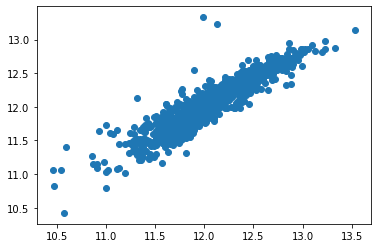

In [66]:
y_hat = lasso.predict(X_train)
plt.scatter(y_train,y_hat)

In [67]:
s_lasso = np.mean(np.sqrt(-cross_val_score(lasso,X_train,y_train,scoring='neg_mean_squared_error')))
s_lasso

0.16479273800215263

ElasticNet

In [68]:
param_e = {'alpha' :[0.1,1.0,10], 'max_iter' :[1000000], 'l1_ratio':[0.04,0.05], 
           'normalize':[True,False]}

In [69]:
Enet = make_pipeline(RobustScaler(),
                     GridSearchCV(ElasticNet(random_state=1),param_e,
                                  cv=5, scoring = 'neg_mean_squared_error'))

In [70]:
Enet.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('gridsearchcv',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=ElasticNet(alpha=1.0, copy_X=True,
                                                   fit_intercept=True,
                                                   l1_ratio=0.5, max_iter=1000,
                                                   normalize=False,
                                                   positive=False,
                                                   precompute=False,
                                                   random_state=1,
                                                   selection='cyclic',
                                                   tol=0.0001,
                                                   warm_start=False),


In [71]:
s_Enet = np.mean(np.sqrt(-cross_val_score(Enet,X_train,y_train,scoring='neg_mean_squared_error')))
s_Enet

0.16865852639039844

RandomForestRegressor

In [72]:
param_Rf =  {'min_samples_split' : [3,4,6,10], 'n_estimators' : [70,100], 'random_state': [5] }

In [73]:
RF = make_pipeline(RobustScaler(),
                     GridSearchCV(RandomForestRegressor(random_state=1),param_Rf,
                                  cv=5, scoring = 'neg_mean_squared_error'))

In [74]:
RF.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('gridsearchcv',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=RandomForestRegressor(bootstrap=True,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_im...
                                                              min_weight_fraction_leaf=0.0,
                                               

In [75]:
s_RF = np.mean(np.sqrt(-cross_val_score(RF,X_train,y_train,scoring='neg_mean_squared_error')))
s_RF

0.16487203741426928

GradientBoostingRegressor

In [76]:
param_GB = [{'learning_rate': [1,0.1,0.01,0.001],
              'n_estimators': [50, 100, 200, 500, 1000]}]

In [77]:
GB = make_pipeline(RobustScaler(),
                     GridSearchCV(GradientBoostingRegressor(random_state=1),param_GB,
                                  cv=5, scoring = 'neg_mean_squared_error'))

In [78]:
GB.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('gridsearchcv',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=GradientBoostingRegressor(alpha=0.9,
                                                                  criterion='friedman_mse',
                                                                  init=None,
                                                                  learning_rate=0.1,
                                                                  loss='ls',
                                                                  max_depth=3,
                                                                  max_features=None,
                                                                  max_leaf_no...
                                                

In [79]:
s_GB = np.mean(np.sqrt(-cross_val_score(GB,X_train,y_train,scoring='neg_mean_squared_error')))
s_GB

0.15662292287342097

XGBRegressor

In [80]:
param_xgb = [{'learning_rate': [1,0.1,0.01,0.001],
              'n_estimators': [50, 100, 200, 500, 1000],
              'max_depth' : [1,3,5,10,50]}]

In [108]:
xgb = make_pipeline(RobustScaler(),
                     GridSearchCV(XGBRegressor(silent=True,random_state=1),param_xgb,
                                  cv=5, scoring = 'neg_mean_squared_error'))

In [109]:
xgb.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('gridsearchcv',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=XGBRegressor(base_score=0.5,
                                                     booster='gbtree',
                                                     colsample_bylevel=1,
                                                     colsample_bynode=1,
                                                     colsample_bytree=1,
                                                     gamma=0,
                                                     importance_type='gain',
                                                     learni...
                                                     random_state=1,
                                                     reg_alpha=0, reg_

In [110]:
s_xgb = np.mean(np.sqrt(-cross_val_score(xgb,X_train,y_train,scoring='neg_mean_squared_error')))
s_xgb

0.15486551590237863

LGBMRegressor

In [84]:
param_lgb = param_grid = [{
    'n_estimators': [400, 700, 1000],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'min_split_gain': [0.3, 0.4],
}]

In [100]:
lgb = make_pipeline(RobustScaler(),
                     GridSearchCV(LGBMRegressor(verbose_eval=False,random_state=1),param_lgb,
                                  cv=5, scoring = 'neg_mean_squared_error'))

In [86]:
lgb.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('gridsearchcv',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=LGBMRegressor(boosting_type='gbdt',
                                                      class_weight=None,
                                                      colsample_bytree=1.0,
                                                      importance_type='split',
                                                      learning_rate=0.1,
                                                      max_depth=-1,
                                                      min_child_s...
                                                      reg_alpha=0.0,
                                                      reg_lambda=0.0,
                                                

In [87]:
s_lgb = np.mean(np.sqrt(-cross_val_score(lgb,X_train,y_train,scoring='neg_mean_squared_error')))
s_lgb

0.16622275063411016

In [88]:
list_scores = [s_lasso, s_Enet, s_RF,s_GB,s_xgb,s_lgb]
list_regressors = ['Lasso','Enet','RF','GB','xgb','lgb']

Text(0, 0.5, 'RMSE')

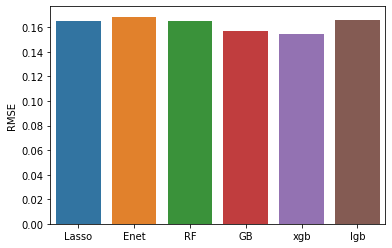

In [111]:
sns.barplot(x=list_regressors, y=list_scores)
plt.ylabel('RMSE')

Pred

In [90]:
def rmsle(y, y_pred): 
    return np.sqrt(mean_squared_error(y, y_pred))

In [91]:
pred_train = GB.predict(X_train)
pred_val = GB.predict(X_val)
print('train rmse score',rmsle(y_train,pred_train))
print('val rmse score', rmsle(y_val,pred_val))

train rmse score 0.10727088692815051
val rmse score 0.12749488879264795


In [92]:
pred_train2 = xgb.predict(X_train)
pred_val2 = xgb.predict(X_val)
print('train rmse score',rmsle(y_train,pred_train2))
print('val rmse score', rmsle(y_val,pred_val2))

train rmse score 0.09578206404456223
val rmse score 0.12638333295356394


sub

In [93]:
xgb_pred =xgb.predict(new_test)

In [94]:
sub = pd.DataFrame()

In [95]:
sub['Id'] = test['Id']

In [96]:
sub['SalePrice'] = xgb_pred

In [97]:
sub['SalePrice'] = np.exp(sub['SalePrice'])

In [98]:
sub.head()

,Id,SalePrice
0,1461,118006.773438
1,1462,149163.437500
2,1463,170561.000000
3,1464,182579.093750
4,1465,197753.484375


In [99]:
sub.to_csv('submission.csv', index=False)